# Saving the parameters of a neural network and reloading the NN later on

- Check the documentation of PyTorch and provide an example (extending those in the
textbook) where the model parameters (w and b) are saved to be used again to initialize
the model at a later time. This is very important for large scale NN implementations.
Implement this for one of the examples in Chapter 3.

# Initialization of code and workspace

In [ ]:
!pip install d2l==1.0.3
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
from google.colab import drive # for .pth weights and biases saving

# Mount the shared drive [for file saving]
#drive.mount('/content/drive')


#Set Random Seed for Operation
# seed = 24
# torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# Creating the original model

L2 norm of w: 0.013319125398993492


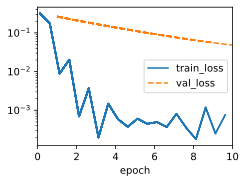

In [ ]:
wd = 3 # weight decay
lr = 0.01 # learning rate

class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

def l2_penalty(w):
    return (w ** 2).sum() / 2

class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

model = WeightDecay(wd, lr)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))

# Saving the weights/biases to our Intro to AI shared drive
In order to run successfully shared_drive_path should be replaced with the path to where the user would like the parameter .pth file to be saved.

In [ ]:
# Define the path to the shared drive
shared_drive_path = '/content/drive/Shared drives/IntroToAI/Homeworks/Kalicak-Ritterbusch HW2/'

# Specify the file path within the shared drive
file_path = shared_drive_path + 'model_parameters.pth'

# Save the model parameters to the specified file path
torch.save({'weight': model.net.weight, 'bias': model.net.bias}, file_path)

# display the weights and biases being saved
# loaded = torch.load(file_path)
# print(loaded)

# Reloading the weights and biases into a new model

L2 norm of w: 0.01333083026111126


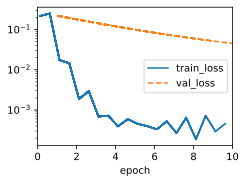

In [ ]:
# Load the parameters from test.pth
loaded_params = torch.load(file_path)

# Extract the weights and biases from the loaded parameters
loaded_weights = loaded_params['weight']
loaded_bias = loaded_params['bias']

wd = 3 # weight decay
lr = 0.01 # learning rate

class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

def l2_penalty(w):
    return (w ** 2).sum() / 2

class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)


model = WeightDecay(wd, lr)

# Assign the loaded weights and biases to the model
model.net.weight.data = loaded_weights
model.net.bias.data = loaded_bias

# print the weights and biases to make sure they match the ones above
# print("Model Weights:", model.net.weight.data)
# print("Model Bias:", model.net.bias.data)

# run the model
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))
'''
Purpose of printing the L2 norm:
If the L2 norm remains relatively small throughout
training, it suggests that the weight decay regularization is effectively controlling
the weights' magnitudes. However, if the L2 norm grows excessively, it may indicate that
the weight decay factor needs adjustment or that the model is overfitting.
'''